<a href="https://colab.research.google.com/github/Joshua-Ranish-T/NLP-Pipeline/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing Pipeline**


# Data Acquisition
Extraction of data

# Text Cleaning

removing unnecessary stuffs like html tag,etc with reqex,unicode

In [ ]:
import re
text = """<gfg>
#GFG Geeks Learning together
url <https://www.geeksforgeeks.org/>,
email <acs@sdf.dv>
"""

html = re.compile('[<,#*?>]')
text = html.sub(r'',text)
url = re.compile('https?://\S+|www\.S+')
text = url.sub(r'',text)
email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
text = email.sub(r'',text)

print(text)

gfg 
GFG Geeks Learning together 
url  
email 



# Text preprocessing



# Tokenization - breaks text into smaller chunks known as tokens

In [ ]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize

# Download both punkt and punkt_tab
nltk.download('punkt')
nltk.download('punkt_tab')

text = 'GeeksforGeeks is a very famous edutech company in the IT industry.'
tokens = word_tokenize(text)

print(tokens)

['GeeksforGeeks', 'is', 'a', 'very', 'famous', 'edutech', 'company', 'in', 'the', 'IT', 'industry', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Lowercasing

In [ ]:
texter = [i.lower() for i in tokens]
texter

['geeksforgeeks',
 'is',
 'a',
 'very',
 'famous',
 'edutech',
 'company',
 'in',
 'the',
 'it',
 'industry',
 '.']

# stop word Removal

In [ ]:
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in texter if token not in stop_words]
filtered_tokens
# stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['geeksforgeeks', 'famous', 'edutech', 'company', 'industry', '.']

# Remove digit/puntuation

In [ ]:
import string
cleaned_tokens = [token for token in filtered_tokens
                  if not token.isdigit() and not token in string.punctuation]
cleaned_tokens

['geeksforgeeks', 'famous', 'edutech', 'company', 'industry']

# Stemming

converts to base form by removing suffix term like runner -> run

In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
# stemmed_tokens = [stemmer.stem(token) for token in cleaned_tokens]
# stemmed_tokens
print(stemmer.stem('beautiful'))

beauti


# Lemmitization

converts to base form using parts of speech like better to good (good,better,best)

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the wordnet resource for lemmatization
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
lemmatized_tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...


['geeksforgeeks', 'famous', 'edutech', 'company', 'industry']

# parts of speech

-Identifying the parts of speech like noun,adj,verb...

In [ ]:
from nltk.tag import pos_tag
import nltk # Import nltk

# Download the required resources for pos_tag
nltk.download('averaged_perceptron_tagger') # This was already there
nltk.download('averaged_perceptron_tagger_eng') # Add this line to download the specific resource

pos_tags = pos_tag(stemmed_tokens)
pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('geeksforgeek', 'RB'),
 ('famous', 'JJ'),
 ('edutech', 'NN'),
 ('compani', 'NN'),
 ('industri', 'NN')]

# Named Entity Recognition
Identifying named entities such as person names, organizations, locations...

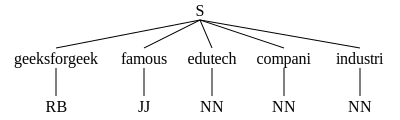

In [ ]:

named_entities = ne_chunk(pos_tags)
named_entities

# **Feature Engineering**
converting to vector

# one hot encoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

categories = ['Red', 'Green', 'Blue', 'Red', 'Green']

# Reshape the data to be a 2D array (required by OneHotEncoder)
categories_reshaped = np.array(categories).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded_data = encoder.fit_transform(categories_reshaped)

print("Original data:", categories)
print("One-hot encoded data:\n", one_hot_encoded_data)

print("Categories:", encoder.categories_)



Original data: ['Red', 'Green', 'Blue', 'Red', 'Green']
One-hot encoded data:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Categories: [array(['Blue', 'Green', 'Red'], dtype='<U5')]


# Bag of words

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer


documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third document.",
    "Is this the first document?",
]

vectorizer = CountVectorizer()

bag_of_words_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and the Bag of Words matrix
print("Feature names:", feature_names)
print("Bag of Words Matrix:\n", bag_of_words_matrix.toarray())

Feature names: ['and' 'document' 'first' 'is' 'second' 'the' 'third' 'this']
Bag of Words Matrix:
 [[0 1 1 1 0 1 0 1]
 [0 2 0 1 1 1 0 1]
 [1 1 0 1 0 1 1 1]
 [0 1 1 1 0 1 0 1]]


# Term Frequency - Inverse Document Frequency


*   TF means probablity of finding the word in the sentence.
*   idf means log(Tot no of sentences / no.of sentences containing the word).






In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third document.",
    "Is this the first document?",
]


vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix and feature names
print("Feature names:", feature_names)
print("TF-IDF Matrix:\n", tfidf_matrix.toarray()) #

Feature names: ['and' 'document' 'first' 'is' 'second' 'the' 'third' 'this']
TF-IDF Matrix:
 [[0.         0.39896105 0.60276058 0.39896105 0.         0.39896105
  0.         0.39896105]
 [0.         0.61221452 0.         0.30610726 0.5865905  0.30610726
  0.         0.30610726]
 [0.56894695 0.29690012 0.         0.29690012 0.         0.29690012
  0.56894695 0.29690012]
 [0.         0.39896105 0.60276058 0.39896105 0.         0.39896105
  0.         0.39896105]]


# **Word embeddings**



# Cbow - Continuous Bag Of Words
predict target value by its surrounding words

# skipgram

predict surrounding words from target word

# pre-trained word embeddings

Word2vec ,etc..